Instalar depencencias y 

In [117]:
!pip install tensorflow tensorflow-gpu pandas sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [119]:
from google.colab import drive 

In [120]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
os.path.join("/content/drive/MyDrive/youtoxic_english_1000.csv")

'/content/drive/MyDrive/youtoxic_english_1000.csv'

In [122]:
df = pd.read_csv(os.path.join("/content/drive/MyDrive/youtoxic_english_1000.csv"))


In [123]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [124]:
df.tail()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,I remember that they sent in the national defe...,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats don`t represent the problem. Race baitin...,True,False,False,False,False,True,True,False,False,False,False,False
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,The quote from the mother... Wow that hit hard...,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,this video is so racist,False,False,False,False,False,False,False,False,False,False,False,False
999,UgjBJKQSoQMQ6ngCoAEC,XRuCW80L9mA,"God, the narrator has such an annoying lisp.",False,False,False,False,False,False,False,False,False,False,False,False


In [125]:
df.iloc[6]['Text']

'Check out this you tube post. "Black man goes on an epic rant against Ferguson rioters."\n\nAlthough his message is delivered with childish, cartoon-ish emotions.... He is one of the very few African American\'s who gets it.'

In [126]:
df[df.columns[4:]].iloc[6]

IsAbusive          False
IsThreat           False
IsProvocative      False
IsObscene          False
IsHatespeech        True
IsRacist            True
IsNationalist      False
IsSexist           False
IsHomophobic       False
IsReligiousHate    False
IsRadicalism       False
Name: 6, dtype: bool

1. Preprocesado

In [ ]:
!pip list

In [128]:
from tensorflow.keras.layers import TextVectorization

In [129]:
X = df['Text']
y = df[df.columns[3:]].values.astype(int)

In [130]:
df[df.columns[3:]].values.astype(int)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [131]:
df['Text']

0      If only people would just take a step back and...
1      Law enforcement is not trained to shoot to app...
2      \nDont you reckon them 'black lives matter' ba...
3      There are a very large number of people who do...
4      The Arab dude is absolutely right, he should h...
                             ...                        
995    I remember that they sent in the national defe...
996    Stats don`t represent the problem. Race baitin...
997    The quote from the mother... Wow that hit hard...
998                              this video is so racist
999        God, the narrator has such an annoying lisp. 
Name: Text, Length: 1000, dtype: object

In [132]:
MAX_FEATURES = 200000 #numero de palabaras en el vocabulario

In [133]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [134]:
vectorizer.adapt(X.values)

In [135]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([  1, 196, 154,   7, 211])>

In [ ]:
vectorizer.get_vocabulary()

In [137]:
vectorized_text = vectorizer(X.values)

In [138]:
len(X)

1000

In [139]:
vectorized_text

<tf.Tensor: shape=(1000, 1800), dtype=int64, numpy=
array([[  26,   82,   18, ...,    0,    0,    0],
       [ 169,  447,    7, ...,    0,    0,    0],
       [  55,    9, 2944, ...,    0,    0,    0],
       ...,
       [   2, 1158,   64, ...,    0,    0,    0],
       [  12,   73,    7, ...,    0,    0,    0],
       [ 229,    2, 3333, ...,    0,    0,    0]])>

In [140]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [141]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [142]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [143]:
len(test)

6

In [144]:
train_generator = train.as_numpy_iterator()

In [145]:
train_generator.next()

(array([[ 492,   54,  884, ...,    0,    0,    0],
        [ 156,    9,  168, ...,    0,    0,    0],
        [  53,   25,   62, ...,    0,    0,    0],
        ...,
        [   9, 1823,    3, ...,    0,    0,    0],
        [3369,    6,    2, ...,    0,    0,    0],
        [ 760,  168,  352, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0,

2. Crear modelo secuencial

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense
from keras.layers import Embedding

In [147]:
y.shape

(1000, 12)

In [148]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [149]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(12, activation='sigmoid'))


In [153]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam',metrics=['binary_accuracy'])


In [154]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 12)                1548      
                                                      

In [155]:
history = model.fit(train, epochs=3, validation_data=val)

Epoch 1/3
44/44 [==============================] - 73s 2s/step - loss: 0.2308 - binary_accuracy: 0.8960 - val_loss: 0.2101 - val_binary_accuracy: 0.9093
Epoch 2/3
44/44 [==============================] - 92s 2s/step - loss: 0.1947 - binary_accuracy: 0.9125 - val_loss: 0.1665 - val_binary_accuracy: 0.9275
Epoch 3/3
44/44 [==============================] - 70s 2s/step - loss: 0.1712 - binary_accuracy: 0.9265 - val_loss: 0.1522 - val_binary_accuracy: 0.9392


In [157]:
history.history

{'loss': [0.2307535707950592, 0.19474712014198303, 0.17115522921085358],
 'binary_accuracy': [0.8959516286849976,
  0.9125238656997681,
  0.9264915585517883],
 'val_loss': [0.21012991666793823, 0.16652679443359375, 0.15222090482711792],
 'val_binary_accuracy': [0.9092881679534912,
  0.9275172352790833,
  0.9392361044883728]}

In [158]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

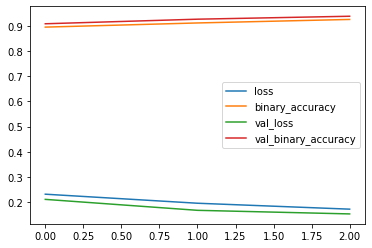

In [159]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

3. Make Prediction

In [167]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [ ]:
input_text

In [169]:
df.columns[3:]

Index(['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
       'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic',
       'IsReligiousHate', 'IsRadicalism'],
      dtype='object')

In [171]:
batch = test.as_numpy_iterator().next()

In [173]:
batch_X, batch_y = test.as_numpy_iterator().next()


In [ ]:
batch_y

In [177]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 406ms/step


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
res = model.predict(np.expand_dims(input_text, 0))

4. Evaluate model

In [180]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [185]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [186]:
for batch in test.as_numpy_iterator():
  #unpack the batch
  X_true, y_true = batch
  #make a prediction
  yhat = model.predict(X_true)

  #flatten the predictions
  y_true = y_true.flatten()
  yhat= yhat.flatten()

  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 198ms/step


In [187]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision: 0.8181818127632141, Recall:0.529411792755127, Accuracy:0.9479166865348816


5. Test and gradio

In [188]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 5.4 MB/s 
     |████████████████████████████████| 106 kB 61.0 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 278 kB 49.5 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 2.3 MB 38.6 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 213 kB 46.6 MB/s 
     |████████████████████████████████| 64 kB 2.6 MB/s 
     |████████████████████████████████| 80 kB 7.4 MB/s 
     |████████████████████████████████| 68 kB 6.0 MB/s 
     |████████████████████████████████| 68 kB 5.0 MB/s 
     |████████████████████████████████| 68 kB 5.6 MB/s 
     |████████████████████████████████| 68 kB 3.5 M

In [193]:
import tensorflow as tf
import gradio as gr

In [194]:
model.save('toxicity.h5')

In [195]:
model = tf.keras.models.load_model('toxicity.h5')

In [201]:
imput_str = vectorizer('hey i freaken you!. I am coming for you. I am going to hurt you.')

In [202]:
res = model.predict(np.expand_dims(imput_str,0))

1/1 [==============================] - 0s 130ms/step


In [203]:
res

array([[3.5702178e-01, 3.1845522e-01, 2.8919782e-03, 1.0875674e-01,
        3.4792524e-02, 2.4079405e-02, 2.1491550e-02, 1.5790248e-03,
        6.0849470e-06, 2.3852569e-06, 7.6081272e-04, 1.2475842e-06]],
      dtype=float32)

In [204]:
df.columns[3:-1]

Index(['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
       'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic',
       'IsReligiousHate'],
      dtype='object')

In [205]:
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)

  text = ''
  for idx,col in enumerate(df.columns[3:]):
    text += '{}: {}\n'.format(col, results[0][idx]>0.5)

  return text

In [209]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')


In [211]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://b3db036899371075.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
